# We can convert the 6d to 7D to be more similar to Lockwood et al. 2022

In [425]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [426]:
import os

ex_path = "/Users/simon/new-orleans/data/kate_h08"
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

In [427]:
file_names = ["fort.73.nc", "fort.74.nc", "fort.63.nc", "fort.64.nc"]
variables = [("pressure",), ("windx", "windy"), ("zeta",), ("u-vel", "v-vel")]

In [428]:
import netCDF4 as nc

In [429]:
for i in range(len(file_names)):
    print([x for x in nc.Dataset(os.path.join(ex_path, file_names[i])).variables])

['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'pressure']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'windx', 'windy']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'zeta']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'u-vel', 'v-vel']


In [430]:
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        print(nc.Dataset(os.path.join(ex_path, file_names[i]))[variable].long_name)

pressure
air pressure at sea level
windx
e/w wind velocity
windy
n/s wind velocity
zeta
water surface elevation above geoid
u-vel
water column vertically averaged east/west velocity
v-vel
water column vertically averaged north/south velocity


In [431]:
ds = nc.Dataset(os.path.join(ex_path, file_names[0]))

In [432]:
ds["pressure"].long_name

'air pressure at sea level'

In [433]:
ds["time"].long_name

'model time'

In [434]:
ds["time"].units

'seconds since 2020-04-28 00:00:00'

In [435]:
ds["time"][:]

masked_array(data=[   4800.,    9600.,   14400.,   19200.,   24000.,
                     28800.,   33600.,   38400.,   43200.,   48000.,
                     52800.,   57600.,   62400.,   67200.,   72000.,
                     76800.,   81600.,   86400.,   91200.,   96000.,
                    100800.,  105600.,  110400.,  115200.,  120000.,
                    124800.,  129600.,  134400.,  139200.,  144000.,
                    148800.,  153600.,  158400.,  163200.,  168000.,
                    172800.,  177600.,  182400.,  187200.,  192000.,
                    196800.,  201600.,  206400.,  211200.,  216000.,
                    220800.,  225600.,  230400.,  235200.,  240000.,
                    244800.,  249600.,  254400.,  259200.,  264000.,
                    268800.,  273600.,  278400.,  283200.,  288000.,
                    292800.,  297600.,  302400.,  307200.,  312000.,
                    316800.,  321600.,  326400.,  331200.,  336000.,
                    340800.,  3456

## Add all this weird nc data into a single xarray dataset.

In [436]:
import xarray as xr

In [437]:
traj_ds = xr.open_dataset(os.path.join(ex_path, "traj.nc"))

In [438]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 ...
    lat      (time) float64 ...

### Mess around with ADCIRC mesh

ds["adcirc_mesh"]

In [439]:
# triangular mesh elements stored in "element" variable
ds["element"][:]

masked_array(
  data=[[5189, 5434, 5190],
        [7845, 7777, 7844],
        [4551, 4806, 4807],
        ...,
        [ 997, 1079, 1078],
        [ 996, 1078, 1077],
        [1079, 1168, 1078]],
  mask=False,
  fill_value=999999,
  dtype=int32)

In [440]:
ds["element"][:].shape

(14761, 3)

Dimension: element, vertex, Units: mesh component [dimensionless]

In [441]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [ ]:
ds["depth"][:]  # depth at nodes

masked_array(data=[1., 1., 1., ..., 1., 1., 1.],
             mask=False,
       fill_value=1e+20)

In [ ]:
ds["depth"][:].max(), ds["depth"][:].min()  # can only get down to 1 meter of depth

(7987.0644531, 1.0)

In [ ]:
ds["depth"][:].shape

(8303,)

In [ ]:
xr.DataArray(ds["depth"][:], dims=["node"])

<xarray.DataArray (node: 8303)>
array([1., 1., 1., ..., 1., 1., 1.])
Dimensions without coordinates: node

### Let's look at the main variables

In [ ]:
ds["pressure"][:].shape  # pressure at nodes

(252, 8303)

In [ ]:
xr.Dataset(data_vars=dict(pressure=(["time", "node"], ds["pressure"][:])))

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [ ]:
ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        ds_list.append(
            xr.Dataset(
                data_vars={
                    variable: (
                        ["time", "node"],
                        nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:],
                    ),
                }
            )
        )

pressure
windx
windy
zeta
u-vel
v-vel


In [ ]:
ds_list[0]

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [ ]:
merge_ds = xr.merge(ds_list)

In [ ]:
merge_ds

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

### How to convert from model time to datetime?

ds

In [ ]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [ ]:
merge_ds["pressure"].shape

(252, 8303)

In [ ]:
252 / 14

18.0

In [ ]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [ ]:
31 - 25

6

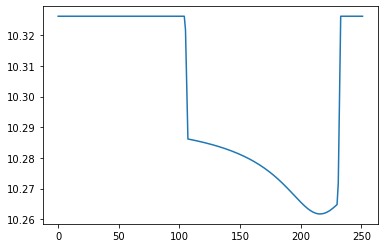

In [ ]:
import matplotlib.pyplot as plt

plt.plot(merge_ds["pressure"].values[:, 25])

In [ ]:
merge_ds["pressure"].values.shape

(252, 8303)

Text(0.5, 0, 'Time')

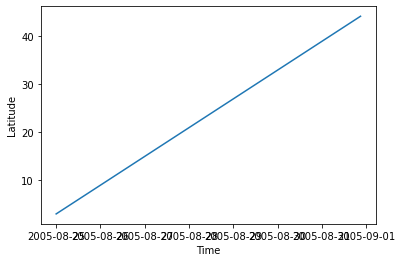

In [ ]:
plt.plot(traj_ds["time"].values, traj_ds["lat"].values)
plt.ylabel("Latitude")
plt.xlabel("Time")

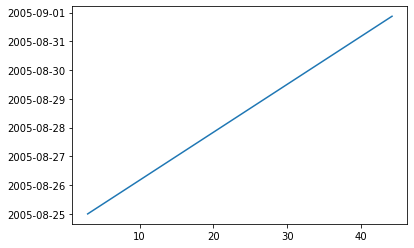

In [ ]:
plt.plot(traj_ds["lat"].values, traj_ds["time"].values)

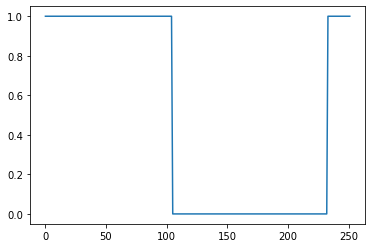

In [ ]:
import numpy as np

bool_array = merge_ds["pressure"].values[:, 3000] > 10.32619776 - 0.0001

plt.plot(bool_array)
change_array = np.diff(bool_array.astype(int))

In [ ]:
np.where(change_array != 0)

(array([104, 232]),)

In [ ]:
bool_array[105:233]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [ ]:
bool_array[105:233].shape

(128,)

In [ ]:
traj_ds["time"].values.shape

(56,)

In [ ]:
128 / 56

2.2857142857142856

In [ ]:
traj_ds["time"].values

array(['2005-08-25T00:00:00.000000000', '2005-08-25T03:00:00.000000000',
       '2005-08-25T06:00:00.000000000', '2005-08-25T09:00:00.000000000',
       '2005-08-25T12:00:00.000000000', '2005-08-25T15:00:00.000000000',
       '2005-08-25T18:00:00.000000000', '2005-08-25T21:00:00.000000000',
       '2005-08-26T00:00:00.000000000', '2005-08-26T03:00:00.000000000',
       '2005-08-26T06:00:00.000000000', '2005-08-26T09:00:00.000000000',
       '2005-08-26T12:00:00.000000000', '2005-08-26T15:00:00.000000000',
       '2005-08-26T18:00:00.000000000', '2005-08-26T21:00:00.000000000',
       '2005-08-27T00:00:00.000000000', '2005-08-27T03:00:00.000000000',
       '2005-08-27T06:00:00.000000000', '2005-08-27T09:00:00.000000000',
       '2005-08-27T12:00:00.000000000', '2005-08-27T15:00:00.000000000',
       '2005-08-27T18:00:00.000000000', '2005-08-27T21:00:00.000000000',
       '2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28

In [ ]:
merge_ds["pressure"].values

array([[10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       ...,
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776]])

### summary of time differences
So the time for the input seems to be every three hours for 56 timesteps -- for 7 days of total time.
For the output this seems to correspond to [104, 232] - so 128 or so timesteps (possibly off by one error) so seems to be an 80 minute timestep - 1:20.

In [ ]:
56 * 3 / 24

7.0

In [ ]:
232 - 104

128

In [ ]:
128 / 7

18.285714285714285

In [ ]:
nc.Dataset(os.path.join(ex_path, file_names[0]))["time"].units

'seconds since 2020-04-28 00:00:00'

In [ ]:
np.diff(nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:])

masked_array(data=[4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800.,

In [ ]:
4800 / 60

80.0

In [ ]:
from datetime import datetime, timedelta

seconds_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:]
start_input = traj_ds["time"].values[0]
start_input_date = datetime.utcfromtimestamp(
    (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
)
time_array = [
    start_input_date + timedelta(minutes=seconds_array[i] / 60 - 105 * 80)
    for i in range(len(seconds_array))
]

In [ ]:
merge_ds.assign_coords(time=time_array)

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Coordinates:
  * time      (time) datetime64[ns] 2005-08-19T05:20:00 ... 2005-09-02T04:00:00
Dimensions without coordinates: node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

In [ ]:
start_input = traj_ds["time"].values[0]

In [ ]:
xr.merge(
    [traj_ds.rename({"time": "input_time"}), merge_ds.rename({"time": "output_time"})]
)

<xarray.Dataset>
Dimensions:     (input_time: 56, output_time: 252, node: 8303)
Coordinates:
  * input_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Dimensions without coordinates: output_time, node
Data variables:
    lon         (input_time) float64 -88.97 -88.97 -88.97 ... -88.97 -88.97
    lat         (input_time) float64 2.945 3.695 4.446 5.196 ... 42.7 43.45 44.2
    pressure    (output_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zeta        (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    u-vel       (output_time, node) float64 2.479e-05 2.382e-05 ... -0.001961
    v-vel       (output_time, node) float64 5.628e-06 1.081e-05 ... -0.00115

In [ ]:
start_input

numpy.datetime64('2005-08-25T00:00:00.000000000')

In [ ]:
date = datetime.utcfromtimestamp(
    (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
)

In [ ]:
date

datetime.datetime(2005, 8, 25, 0, 0)

In [ ]:
dir(start_input)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_interface__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__xor__',
 'all',
 'any',
 'argmax',
 'argmin',
 'argsort',
 'ast

### Depth and Mesh dataset

In [ ]:
depth_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["depth"][:]
element_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["element"][:]

In [ ]:
mesh_ds = xr.Dataset(
    data_vars=dict(
        depth=(["node"], depth_array), triangle=(["element", "vertex"], element_array)
    )
)

In [ ]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [ ]:
ds["ibtype"].long_name

'type of normal flow (discharge) boundary'

In [ ]:
ds["ibtype"].shape

(44,)

### Get Max values

In [ ]:
file_names = ["maxele.63.nc", "maxwvel.63.nc", "maxvel.63.nc"]
variables = [
    ("zeta_max", "time_of_zeta_max"),
    ("wind_max", "time_of_wind_max"),
    ("vel_max", "time_of_vel_max"),
]
new_ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        new_ds_list.append(
            xr.Dataset(
                data_vars={
                    variable: (
                        ["node"],
                        nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:],
                    ),
                }
            )
        )
max_ds = xr.merge(new_ds_list)

In [ ]:
nc.Dataset(os.path.join(ex_path, "maxvel.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:14  00:00
    modification_date: 2023-02-07 22:14:14  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [ ]:
nc.Dataset(os.path.join(ex_path, "maxele.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:13  00:00
    modification_date: 2023-02-07 22:14:13  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [ ]:
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

### Merge all together

In [ ]:
xr.merge(
    [
        traj_ds.rename({"time": "input_time"}),
        merge_ds.rename({"time": "output_time"}),
        mesh_ds,
    ]
)

<xarray.Dataset>
Dimensions:     (input_time: 56, output_time: 252, node: 8303, element: 14761,
                 vertex: 3)
Coordinates:
  * input_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Dimensions without coordinates: output_time, node, element, vertex
Data variables:
    lon         (input_time) float64 -88.97 -88.97 -88.97 ... -88.97 -88.97
    lat         (input_time) float64 2.945 3.695 4.446 5.196 ... 42.7 43.45 44.2
    pressure    (output_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy       (output_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    zeta        (output_time, node) float64 3.793e-06 2.164e-05 ... -0.136
    u-vel       (output_time, node) float64 2.479e-05 2.382e-05 ... -0.001961
    v-vel       (output_time, node) float64 5.628e-06 1.081e-05 ... -0.00115
    depth       (node) float64 1.0 1.0 1.0 3.835 1.0 ... 17.61 14.61 1.0 1.0 1.0
    triangle    (element, vertex) int32 5189 5434 5190 7845 ... 1079 1168 1078

In [ ]:
def get_data(ex_path: str) -> xr.Dataset:
    file_names = ["fort.73.nc", "fort.74.nc", "fort.63.nc", "fort.64.nc"]
    variables = [("pressure",), ("windx", "windy"), ("zeta",), ("u-vel", "v-vel")]
    ds_list = []
    for i in range(len(file_names)):
        for variable in variables[i]:
            ds_list.append(
                xr.Dataset(
                    data_vars={
                        variable: (
                            ["time", "node"],
                            nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][
                                :
                            ],
                        ),
                    }
                )
            )
    merge_ds = xr.merge(ds_list)
    seconds_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:]
    start_input = traj_ds["time"].values[0]
    start_input_date = datetime.utcfromtimestamp(
        (start_input - np.datetime64("1970-01-01T00:00:00")) / np.timedelta64(1, "s")
    )
    time_array = [
        start_input_date + timedelta(minutes=seconds_array[i] / 60 - 105 * 80)
        for i in range(len(seconds_array))
    ]
    merge_ds = merge_ds.assign_coords(time=time_array)
    x_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["x"][:]
    y_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["y"][:]
    depth_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["depth"][:]
    element_array = nc.Dataset(os.path.join(ex_path, file_names[0]))["element"][:]
    mesh_ds = xr.Dataset(
        data_vars=dict(
            depth=(["node"], depth_array),
            triangle=(["element", "vertex"], element_array),
            x=(["node"], x_array),
            y=(["node"], y_array),
        )
    )
    file_names = ["maxele.63.nc", "maxwvel.63.nc", "maxvel.63.nc", "minpr.63.nc"]
    variables = [
        ("zeta_max", "time_of_zeta_max"),
        ("wind_max", "time_of_wind_max"),
        ("vel_max", "time_of_vel_max"),
        ("pressure_min", "time_of_pressure_min"),
    ]
    new_ds_list = []
    for i in range(len(file_names)):
        for variable in variables[i]:
            new_ds_list.append(
                xr.Dataset(
                    data_vars={
                        variable: (
                            ["node"],
                            nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][
                                :
                            ],
                        ),
                    }
                )
            )
    max_ds = xr.merge(new_ds_list)
    return xr.merge(
        [
            traj_ds.rename({"time": "input_time", "lon": "clon", "lat": "clat"}),
            merge_ds.rename({"time": "output_time"}),
            mesh_ds.rename({"x": "lon", "y": "lat"}),
            max_ds,
        ]
    )

In [ ]:
combined_ds = get_data(ex_path)

In [ ]:
combined_ds

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/20)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    wind_max              (node) float64 4.659 4.598 0.0 4.649 ... 0.0 0.0 0.0
    time_of_wind_max      (node) float64 1.048e+06 1.048e+06 nan ... nan nan nan
    vel_max               (node) float64 0.1289 0.1069 0.5621 ... 0.1707 0.1136
    time_of_vel_max       (node) float64 2.183e+05 1.044e+06 ... 8.982e+05
    pressure_min          (node) float64 10.26 10.26 10.33 ... 10.33 10.33 10.33
    time_of_pressure_min  (node) float64 1.048e+06 1.048e+06 20.0 ... 20.0 20.0

In [ ]:
combined_ds.to_netcdf(os.path.join(ex_path, "big_ds.nc"), engine="netcdf4")

In [ ]:
combined_ds

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/20)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    wind_max              (node) float64 4.659 4.598 0.0 4.649 ... 0.0 0.0 0.0
    time_of_wind_max      (node) float64 1.048e+06 1.048e+06 nan ... nan nan nan
    vel_max               (node) float64 0.1289 0.1069 0.5621 ... 0.1707 0.1136
    time_of_vel_max       (node) float64 2.183e+05 1.044e+06 ... 8.982e+05
    pressure_min          (node) float64 10.26 10.26 10.33 ... 10.33 10.33 10.33
    time_of_pressure_min  (node) float64 1.048e+06 1.048e+06 20.0 ... 20.0 20.0

In [ ]:
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'big_ds.nc',
 'traj.nc',
 'fort.222']

In [ ]:
ex_path

'/Users/simon/new-orleans/data/kate_h08'

In [ ]:
ls -lash '/Users/simon/new-orleans/data/kate_h08'

total 450440
     0 drwxr-xr-x  31 simon  staff   992B Feb 10 18:13 ./
     0 drwxr-xr-x  97 simon  staff   3.0K Feb 11 13:03 ../
    88 -rw-r--r--   1 simon  staff    43K Feb  7 22:14 adcirc_log.txt
229032 -rw-r--r--   1 simon  staff    97M Feb 14 14:52 big_ds.nc
  1744 -rw-r--r--   1 simon  staff   870K Feb  7 22:06 fort.14
    40 -rw-r--r--   1 simon  staff    18K Feb  7 22:06 fort.15
  3920 -rw-r--r--   1 simon  staff   1.9M Feb  7 22:14 fort.16
  3072 -rw-r--r--   1 simon  staff   1.5M Feb  7 22:06 fort.217
  2440 -rw-r--r--   1 simon  staff   1.2M Feb  7 22:06 fort.217.nc
  6128 -rw-r--r--   1 simon  staff   3.0M Feb  7 22:06 fort.218
  4856 -rw-r--r--   1 simon  staff   2.4M Feb  7 22:06 fort.218.nc
     8 -rw-r--r--   1 simon  staff    10B Feb  7 22:06 fort.22
 11088 -rw-r--r--   1 simon  staff   5.4M Feb  7 22:08 fort.221
  8776 -rw-r--r--@  1 simon  staff   4.3M Feb  7 22:08 fort.221.nc
 22160 -rw-r--r--   1 simon  staff    11M Feb  7 22:08 fort.222
 17520 -rw-r--r--@  1 simo

In [ ]:
nc.Dataset(os.path.join(ex_path, "minpr.63.nc"))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 454104d
    grid_type: Triangular
    description: OceanMesh2D
    agrid: OceanMesh2D
    rundes: OceanMesh2D
    runid: Run_001
    title: OceanMesh2D
    institution: Notre Dame CHL
    source: OceanMesh2D
    history: History: None
    references: https://github.com/CHLNDDEV/OceanMesh2D/
    comments: Comments: None
    host: Host: Name
    convention: Metric, MSL
    Conventions: UGRID-0.9.0
    contact: name@instit.edu
    creation_date: 2023-02-07 22:14:14  00:00
    modification_date: 2023-02-07 22:14:14  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 20.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 0
    ncor: 1
    ntip: 1
    nws: 12
    nramp: 1
    tau0: -1.0
    statim: 0.0
    reftim: 0.0
    rnday: 14.0
    dramp: 2.0
    a00: 0.0
    b00: 1.0
    c00: 0.0
   

In [ ]:
param_ds = xr.Dataset(
    data_vars={
        # Trajectory
        "angle": 0.0,  # degrees from North
        "speed": 7.71,  # m s**-1
        "point_east": 0.6,  # degrees East of New Orleans
        # Radial Profile of Tropical Cyclone - Holland Hurricane Parameters
        "rmax": 40744.0,  # meters
        "pc": 92800.0,  # Pa
        "vmax": 54.01667,  # m s**-1
        "xn": 1.1249,  # dimensionless
    }
)
param_ds

<xarray.Dataset>
Dimensions:     ()
Data variables:
    angle       float64 0.0
    speed       float64 7.71
    point_east  float64 0.6
    rmax        float64 4.074e+04
    pc          float64 9.28e+04
    vmax        float64 54.02
    xn          float64 1.125

In [ ]:
xr.merge([combined_ds, param_ds])

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 -88.97 -88.97 ... -88.97 -88.97
    clat                  (input_time) float64 2.945 3.695 4.446 ... 43.45 44.2
    pressure              (output_time, node) float64 10.33 10.33 ... 10.33
    windx                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    windy                 (output_time, node) float64 0.0 0.0 0.0 ... 0.0 0.0
    zeta                  (output_time, node) float64 3.793e-06 ... -0.136
    ...                    ...
    speed                 float64 7.71
    point_east            float64 0.6
    rmax                  float64 4.074e+04
    pc                    float64 9.28e+04
    vmax                  float64 54.02
    xn                    float64 1.125

### Loading Artifact from wandb

In [ ]:
import wandb

run = wandb.init()
artifact = run.use_artifact(
    "sdat2/6d_individual_version2/output_dataset:v0", type="dataset"
)
artifact_dir = artifact.download()

wandb: Currently logged in as: sdat2. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact output_dataset:v0, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


In [ ]:
import os

os.listdir(artifact_dir)

['combined_ds.nc']

In [ ]:
import xarray as xr

xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
Dimensions without coordinates: node, element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 ...
    clat                  (input_time) float64 ...
    pressure              (output_time, node) float64 ...
    windx                 (output_time, node) float64 ...
    windy                 (output_time, node) float64 ...
    zeta                  (output_time, node) float64 ...
    ...                    ...
    speed                 float64 ...
    point_east            float64 ...
    rmax                  float64 ...
    pc                    float64 ...
    xn                    float64 ...
    vmax                  float64 ...

In [ ]:
cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

In [ ]:
cds_a = cds_a.assign_coords({"node": cds_a["node"].values + 1})

In [ ]:
cds_a

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
  * node                  (node) int64 1 2 3 4 5 6 ... 8299 8300 8301 8302 8303
Dimensions without coordinates: element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 ...
    clat                  (input_time) float64 ...
    pressure              (output_time, node) float64 ...
    windx                 (output_time, node) float64 ...
    windy                 (output_time, node) float64 ...
    zeta                  (output_time, node) float64 ...
    ...                    ...
    speed                 float64 ...
    point_east            float64 ...
    rmax                  float64 ...
    pc                    float64 ...
    xn                    float64 ...
    vmax                  float64 ...

### Convert to 7D X-input, 1D y-output for training

In [ ]:
cds_a

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, node: 8303,
                           element: 14761, vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
  * node                  (node) int64 1 2 3 4 5 6 ... 8299 8300 8301 8302 8303
Dimensions without coordinates: element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 -41.85 -43.21 ... -114.8 -116.2
    clat                  (input_time) float64 14.15 14.59 15.03 ... 37.85 38.29
    pressure              (output_time, node) float64 ...
    windx                 (output_time, node) float64 ...
    windy                 (output_time, node) float64 ...
    zeta                  (output_time, node) float64 ...
    ...                    ...
    speed                 float64 14.6
    point_east            float64 -0.42
    rmax                  float64 7.8e+03
    pc                    float64 9.08e+04
    xn                    float64 0.86
    vmax                  float64 62.17

In [ ]:
# interpolate results to input time
cds_a[["zeta", "u-vel", "v-vel", "pressure", "windx", "windy"]].interp(
    {"output_time": cds_a["input_time"]}
)

<xarray.Dataset>
Dimensions:      (input_time: 56, node: 8303)
Coordinates:
  * node         (node) int64 1 2 3 4 5 6 7 ... 8298 8299 8300 8301 8302 8303
    output_time  (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
  * input_time   (input_time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    zeta         (input_time, node) float64 0.03289 0.04237 ... 0.07773 0.0484
    u-vel        (input_time, node) float64 0.03362 0.06581 ... 0.001358
    v-vel        (input_time, node) float64 0.08789 0.01979 ... 0.01075 -0.00231
    pressure     (input_time, node) float64 10.33 10.33 10.33 ... 10.33 10.33
    windx        (input_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    windy        (input_time, node) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [ ]:
# turn 7 parameters into array
parray = (
    cds_a[["angle", "speed", "point_east", "rmax", "pc", "vmax", "xn"]]
    .to_array()
    .values
)

In [ ]:
# get clat and clon (centers of cyclone over time)
clat = cds_a["clat"].values
clon = cds_a["clon"].values

In [ ]:
# so we want to format the inputs for machine learning, so we need to get the input data into a 2D array
# parray needs to become as long as clat and clon (repeated entries for 56 timesteps)
# clat and clon need to appended to this array --> a total of 7 + 2 = 9 parameters * 56 timesteps = 504 entries
parray_2d = np.array([parray for _ in range(len(clat))])
# now we need to append clat and clon to this array
parray_2d = np.append(parray_2d, clat.reshape(-1, 1), axis=1)
parray_2d = np.append(parray_2d, clon.reshape(-1, 1), axis=1)
# parray_2d = np.append(parray_2d, clat, axis=1)
# value order is: angle, speed, point_east, rmax, pc, vmax, xn, clat, clon

In [ ]:
parray_2d.shape

(56, 9)

In [ ]:
### output array
oa = cds_a[["zeta", "u-vel", "v-vel"]].interp({"output_time": cds_a["input_time"]})

In [ ]:
from src.constants import NO_BBOX

(indices,) = NO_BBOX.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
oa = oa.isel(node=indices)

In [ ]:
output_array = oa.isel(node=27).to_array().values.transpose()

In [ ]:
cds_a.isel(node=4259 - 1)

<xarray.Dataset>
Dimensions:               (input_time: 56, output_time: 252, element: 14761,
                           vertex: 3)
Coordinates:
  * input_time            (input_time) datetime64[ns] 2005-08-25 ... 2005-08-...
  * output_time           (output_time) datetime64[ns] 2005-08-19T05:20:00 .....
    node                  int64 4259
Dimensions without coordinates: element, vertex
Data variables: (12/27)
    clon                  (input_time) float64 -41.85 -43.21 ... -114.8 -116.2
    clat                  (input_time) float64 14.15 14.59 15.03 ... 37.85 38.29
    pressure              (output_time) float64 ...
    windx                 (output_time) float64 ...
    windy                 (output_time) float64 ...
    zeta                  (output_time) float64 ...
    ...                    ...
    speed                 float64 14.6
    point_east            float64 -0.42
    rmax                  float64 7.8e+03
    pc                    float64 9.08e+04
    xn                    float64 0.86
    vmax                  float64 62.17

In [ ]:
print("parray_2d", parray_2d.shape)
print("output_array", output_array.shape)

parray_2d (56, 9)
output_array (56, 3)


In [ ]:
from src.constants import NO_BBOX


def generate_parray2d_and_output(version=0, index=27):
    # load artifact dataset
    # maybe we can add a loop here to get all the artifacts with different versions
    artifact = run.use_artifact(
        f"sdat2/6d_individual_version2/output_dataset:v{version}", type="dataset"
    )
    artifact_dir = artifact.download()
    cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

    # turn 7 parameters into array
    parray = (
        cds_a[["angle", "speed", "point_east", "rmax", "pc", "vmax", "xn"]]
        .to_array()
        .values
    )

    # get clat and clon (centers of cyclone over time)
    clat = cds_a["clat"].values
    clon = cds_a["clon"].values

    # so we want to format the inputs for machine learning, so we need to get the input data into a 2D array
    # parray needs to become as long as clat and clon (repeated entries for 56 timesteps)
    # clat and clon need to appended to this array --> a total of 7 + 2 = 9 parameters * 56 timesteps = 504 entries
    parray_2d = np.array([parray for _ in range(len(clat))])
    # now we need to append clat and clon to this array
    parray_2d = np.append(parray_2d, clat.reshape(-1, 1), axis=1)
    parray_2d = np.append(parray_2d, clon.reshape(-1, 1), axis=1)
    # parray_2d = np.append(parray_2d, clat, axis=1)
    # value order is: angle, speed, point_east, rmax, pc, vmax, xn, clat, clon

    ### output array
    oa = cds_a[["zeta", "u-vel", "v-vel"]].interp({"output_time": cds_a["input_time"]})

    (indices,) = NO_BBOX.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
    oa = oa.isel(node=indices)

    output_array = oa.isel(node=index).to_array().values.transpose()

    return parray_2d, output_array


parray_2d, output_array = generate_parray2d_and_output(version=0)

wandb: Downloading large artifact output_dataset:v0, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


In [ ]:
parray_2d, output_array = generate_parray2d_and_output(version=2)
print(parray_2d.shape, output_array.shape)

wandb: Downloading large artifact output_dataset:v2, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(56, 9) (56, 3)


Text(0, 0.5, 'zeta [m]')

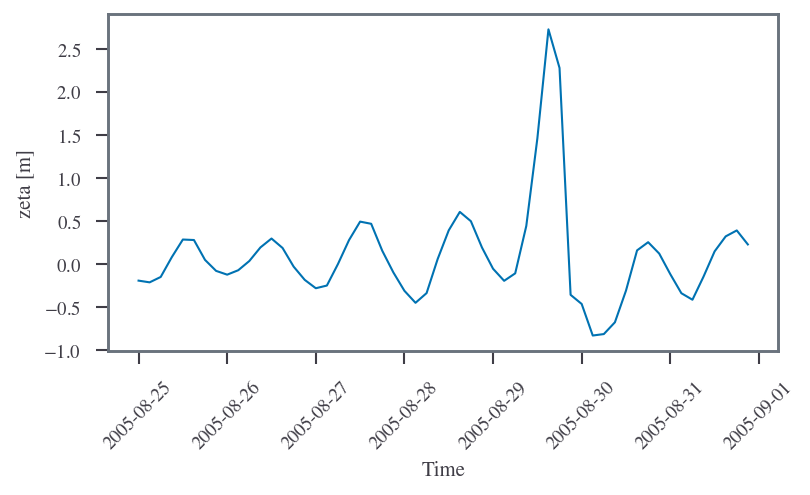

In [ ]:
from sithom.plot import plot_defaults

plot_defaults()
plt.plot(cds_a["input_time"].values, output_array[:, 0])
# need to rotate the x-axis labels
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("zeta [m]")

### Let's load the max data from artifacts as well (only need 1d param_array, and no interpolation)

In [ ]:
from typing import Tuple
from sithom.place import BoundingBox
from src.constants import NO_BBOX


def generate_max_parray_and_output(version=0, bbox: BoundingBox = NO_BBOX) -> Tuple[np.ndarray, np.ndarray]:
    # load artifact dataset
    # maybe we can add a loop here to get all the artifacts with different versions
    artifact = run.use_artifact(
        f"sdat2/6d_individual_version2/output_dataset:v{version}", type="dataset"
    )
    artifact_dir = artifact.download()
    cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

    # turn 7 parameters into array
    parray = (
        cds_a[["angle", "speed", "point_east", "rmax", "pc", "xn"]].to_array().values
    )
    # "vmax",
    # value order is: angle, speed, point_east, rmax, pc, vmax, xn

    ### output array
    oa = cds_a[["zeta_max"]]
    (indices,) = bbox.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
    oa = oa.isel(node=indices)
    output_array = oa.to_array().values.transpose()

    return parray.reshape(1, -1), output_array.reshape(1, -1)

In [ ]:
parray_list = []
output_array_list = []

for i in range(100):
    print(i)
    parray, output_array = generate_max_parray_and_output(version=i)
    parray_list.append(parray)
    output_array_list.append(output_array)
    print(parray.shape, output_array.shape)

parray_mult = np.concatenate(parray_list, axis=0)

0


wandb: Downloading large artifact output_dataset:v0, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
1


wandb: Downloading large artifact output_dataset:v1, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
2


wandb: Downloading large artifact output_dataset:v2, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
3


wandb: Downloading large artifact output_dataset:v3, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
4


wandb: Downloading large artifact output_dataset:v4, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
5


wandb: Downloading large artifact output_dataset:v5, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
6


wandb: Downloading large artifact output_dataset:v6, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
7


wandb: Downloading large artifact output_dataset:v7, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
8


wandb: Downloading large artifact output_dataset:v8, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
9


wandb: Downloading large artifact output_dataset:v9, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
10


wandb: Downloading large artifact output_dataset:v10, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
11


wandb: Downloading large artifact output_dataset:v11, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
12


wandb: Downloading large artifact output_dataset:v12, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
13


wandb: Downloading large artifact output_dataset:v13, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
14


wandb: Downloading large artifact output_dataset:v14, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
15


wandb: Downloading large artifact output_dataset:v15, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
16


wandb: Downloading large artifact output_dataset:v16, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
17


wandb: Downloading large artifact output_dataset:v17, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
18


wandb: Downloading large artifact output_dataset:v18, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
19


wandb: Downloading large artifact output_dataset:v19, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
20


wandb: Downloading large artifact output_dataset:v20, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
21


wandb: Downloading large artifact output_dataset:v21, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
22


wandb: Downloading large artifact output_dataset:v22, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
23


wandb: Downloading large artifact output_dataset:v23, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
24


wandb: Downloading large artifact output_dataset:v24, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
25


wandb: Downloading large artifact output_dataset:v25, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
26


wandb: Downloading large artifact output_dataset:v26, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
27


wandb: Downloading large artifact output_dataset:v27, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
28


wandb: Downloading large artifact output_dataset:v28, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
29


wandb: Downloading large artifact output_dataset:v29, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
30


wandb: Downloading large artifact output_dataset:v30, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
31


wandb: Downloading large artifact output_dataset:v31, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
32


wandb: Downloading large artifact output_dataset:v32, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
33


wandb: Downloading large artifact output_dataset:v33, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
34


wandb: Downloading large artifact output_dataset:v34, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
35


wandb: Downloading large artifact output_dataset:v35, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
36


wandb: Downloading large artifact output_dataset:v36, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
37


wandb: Downloading large artifact output_dataset:v37, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
38


wandb: Downloading large artifact output_dataset:v38, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
39


wandb: Downloading large artifact output_dataset:v39, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
40


wandb: Downloading large artifact output_dataset:v40, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
41


wandb: Downloading large artifact output_dataset:v41, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
42


wandb: Downloading large artifact output_dataset:v42, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
43


wandb: Downloading large artifact output_dataset:v43, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
44


wandb: Downloading large artifact output_dataset:v44, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
45


wandb: Downloading large artifact output_dataset:v45, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
46


wandb: Downloading large artifact output_dataset:v46, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
47


wandb: Downloading large artifact output_dataset:v47, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
48


wandb: Downloading large artifact output_dataset:v48, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
49


wandb: Downloading large artifact output_dataset:v49, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
50


wandb: Downloading large artifact output_dataset:v50, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
51


wandb: Downloading large artifact output_dataset:v51, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
52


wandb: Downloading large artifact output_dataset:v52, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
53


wandb: Downloading large artifact output_dataset:v53, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
54


wandb: Downloading large artifact output_dataset:v54, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
55


wandb: Downloading large artifact output_dataset:v55, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
56


wandb: Downloading large artifact output_dataset:v56, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
57


wandb: Downloading large artifact output_dataset:v57, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
58


wandb: Downloading large artifact output_dataset:v58, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
59


wandb: Downloading large artifact output_dataset:v59, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
60


wandb: Downloading large artifact output_dataset:v60, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
61


wandb: Downloading large artifact output_dataset:v61, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
62


wandb: Downloading large artifact output_dataset:v62, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
63


wandb: Downloading large artifact output_dataset:v63, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.0


(1, 6) (286, 1)
64


wandb: Downloading large artifact output_dataset:v64, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1


(1, 6) (286, 1)
65


wandb: Downloading large artifact output_dataset:v65, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
66


wandb: Downloading large artifact output_dataset:v66, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
67


wandb: Downloading large artifact output_dataset:v67, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
68


wandb: Downloading large artifact output_dataset:v68, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
69


wandb: Downloading large artifact output_dataset:v69, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
70


wandb: Downloading large artifact output_dataset:v70, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.6


(1, 6) (286, 1)
71


wandb: Downloading large artifact output_dataset:v71, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
72


wandb: Downloading large artifact output_dataset:v72, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
73


wandb: Downloading large artifact output_dataset:v73, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
74


wandb: Downloading large artifact output_dataset:v74, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.3


(1, 6) (286, 1)
75


wandb: Downloading large artifact output_dataset:v75, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
76


wandb: Downloading large artifact output_dataset:v76, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
77


wandb: Downloading large artifact output_dataset:v77, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.8


(1, 6) (286, 1)
78


wandb: Downloading large artifact output_dataset:v78, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
79


wandb: Downloading large artifact output_dataset:v79, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
80


wandb: Downloading large artifact output_dataset:v80, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
81


wandb: Downloading large artifact output_dataset:v81, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
82


wandb: Downloading large artifact output_dataset:v82, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
83


wandb: Downloading large artifact output_dataset:v83, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
84


wandb: Downloading large artifact output_dataset:v84, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
85


wandb: Downloading large artifact output_dataset:v85, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
86


wandb: Downloading large artifact output_dataset:v86, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
87


wandb: Downloading large artifact output_dataset:v87, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
88


wandb: Downloading large artifact output_dataset:v88, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.5


(1, 6) (286, 1)
89


wandb: Downloading large artifact output_dataset:v89, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
90


wandb: Downloading large artifact output_dataset:v90, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:14.3


(1, 6) (286, 1)
91


wandb: Downloading large artifact output_dataset:v91, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
92


wandb: Downloading large artifact output_dataset:v92, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.6


(1, 6) (286, 1)
93


wandb: Downloading large artifact output_dataset:v93, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
94


wandb: Downloading large artifact output_dataset:v94, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(1, 6) (286, 1)
95


wandb: Downloading large artifact output_dataset:v95, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.3


(1, 6) (286, 1)
96


wandb: Downloading large artifact output_dataset:v96, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(1, 6) (286, 1)
97


wandb: Downloading large artifact output_dataset:v97, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.0


(1, 6) (286, 1)
98


wandb: Downloading large artifact output_dataset:v98, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.6


(1, 6) (286, 1)
99


wandb: Downloading large artifact output_dataset:v99, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
100


wandb: Downloading large artifact output_dataset:v100, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
101


wandb: Downloading large artifact output_dataset:v101, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
102


wandb: Downloading large artifact output_dataset:v102, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
103


wandb: Downloading large artifact output_dataset:v103, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
104


wandb: Downloading large artifact output_dataset:v104, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
105


wandb: Downloading large artifact output_dataset:v105, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
106


wandb: Downloading large artifact output_dataset:v106, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
107


wandb: Downloading large artifact output_dataset:v107, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
108


wandb: Downloading large artifact output_dataset:v108, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
109


wandb: Downloading large artifact output_dataset:v109, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
110


wandb: Downloading large artifact output_dataset:v110, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
111


wandb: Downloading large artifact output_dataset:v111, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
112


wandb: Downloading large artifact output_dataset:v112, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
113


wandb: Downloading large artifact output_dataset:v113, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
114


wandb: Downloading large artifact output_dataset:v114, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(1, 6) (286, 1)
115


wandb: Downloading large artifact output_dataset:v115, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
116


wandb: Downloading large artifact output_dataset:v116, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
117


wandb: Downloading large artifact output_dataset:v117, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
118


wandb: Downloading large artifact output_dataset:v118, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
119


wandb: Downloading large artifact output_dataset:v119, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.7


(1, 6) (286, 1)
120


wandb: Downloading large artifact output_dataset:v120, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.7


(1, 6) (286, 1)
121


wandb: Downloading large artifact output_dataset:v121, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
122


wandb: Downloading large artifact output_dataset:v122, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
123


wandb: Downloading large artifact output_dataset:v123, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(1, 6) (286, 1)
124


wandb: Downloading large artifact output_dataset:v124, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.5


(1, 6) (286, 1)
125


wandb: Downloading large artifact output_dataset:v125, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
126


wandb: Downloading large artifact output_dataset:v126, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
127


wandb: Downloading large artifact output_dataset:v127, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
128


wandb: Downloading large artifact output_dataset:v128, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
129


wandb: Downloading large artifact output_dataset:v129, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
130


wandb: Downloading large artifact output_dataset:v130, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
131


wandb: Downloading large artifact output_dataset:v131, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
132


wandb: Downloading large artifact output_dataset:v132, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
133


wandb: Downloading large artifact output_dataset:v133, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
134


wandb: Downloading large artifact output_dataset:v134, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(1, 6) (286, 1)
135


wandb: Downloading large artifact output_dataset:v135, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
136


wandb: Downloading large artifact output_dataset:v136, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
137


wandb: Downloading large artifact output_dataset:v137, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
138


wandb: Downloading large artifact output_dataset:v138, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.6


(1, 6) (286, 1)
139


wandb: Downloading large artifact output_dataset:v139, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
140


wandb: Downloading large artifact output_dataset:v140, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
141


wandb: Downloading large artifact output_dataset:v141, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
142


wandb: Downloading large artifact output_dataset:v142, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.1


(1, 6) (286, 1)
143


wandb: Downloading large artifact output_dataset:v143, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
144


wandb: Downloading large artifact output_dataset:v144, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
145


wandb: Downloading large artifact output_dataset:v145, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
146


wandb: Downloading large artifact output_dataset:v146, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
147


wandb: Downloading large artifact output_dataset:v147, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
148


wandb: Downloading large artifact output_dataset:v148, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
149


wandb: Downloading large artifact output_dataset:v149, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
150


wandb: Downloading large artifact output_dataset:v150, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
151


wandb: Downloading large artifact output_dataset:v151, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
152


wandb: Downloading large artifact output_dataset:v152, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
153


wandb: Downloading large artifact output_dataset:v153, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
154


wandb: Downloading large artifact output_dataset:v154, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
155


wandb: Downloading large artifact output_dataset:v155, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
156


wandb: Downloading large artifact output_dataset:v156, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
157


wandb: Downloading large artifact output_dataset:v157, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
158


wandb: Downloading large artifact output_dataset:v158, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
159


wandb: Downloading large artifact output_dataset:v159, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
160


wandb: Downloading large artifact output_dataset:v160, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
161


wandb: Downloading large artifact output_dataset:v161, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
162


wandb: Downloading large artifact output_dataset:v162, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
163


wandb: Downloading large artifact output_dataset:v163, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.8


(1, 6) (286, 1)
164


wandb: Downloading large artifact output_dataset:v164, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
165


wandb: Downloading large artifact output_dataset:v165, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
166


wandb: Downloading large artifact output_dataset:v166, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
167


wandb: Downloading large artifact output_dataset:v167, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:1:12.3


(1, 6) (286, 1)
168


wandb: Downloading large artifact output_dataset:v168, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
169


wandb: Downloading large artifact output_dataset:v169, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
170


wandb: Downloading large artifact output_dataset:v170, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
171


wandb: Downloading large artifact output_dataset:v171, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
172


wandb: Downloading large artifact output_dataset:v172, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
173


wandb: Downloading large artifact output_dataset:v173, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
174


wandb: Downloading large artifact output_dataset:v174, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
175


wandb: Downloading large artifact output_dataset:v175, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
176


wandb: Downloading large artifact output_dataset:v176, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
177


wandb: Downloading large artifact output_dataset:v177, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
178


wandb: Downloading large artifact output_dataset:v178, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
179


wandb: Downloading large artifact output_dataset:v179, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
180


wandb: Downloading large artifact output_dataset:v180, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
181


wandb: Downloading large artifact output_dataset:v181, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
182


wandb: Downloading large artifact output_dataset:v182, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
183


wandb: Downloading large artifact output_dataset:v183, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
184


wandb: Downloading large artifact output_dataset:v184, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
185


wandb: Downloading large artifact output_dataset:v185, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
186


wandb: Downloading large artifact output_dataset:v186, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
187


wandb: Downloading large artifact output_dataset:v187, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
188


wandb: Downloading large artifact output_dataset:v188, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
189


wandb: Downloading large artifact output_dataset:v189, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
190


wandb: Downloading large artifact output_dataset:v190, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
191


wandb: Downloading large artifact output_dataset:v191, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
192


wandb: Downloading large artifact output_dataset:v192, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
193


wandb: Downloading large artifact output_dataset:v193, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
194


wandb: Downloading large artifact output_dataset:v194, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
195


wandb: Downloading large artifact output_dataset:v195, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
196


wandb: Downloading large artifact output_dataset:v196, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.8


(1, 6) (286, 1)
197


wandb: Downloading large artifact output_dataset:v197, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
198


wandb: Downloading large artifact output_dataset:v198, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:13.3


(1, 6) (286, 1)
199


wandb: Downloading large artifact output_dataset:v199, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
200


wandb: Downloading large artifact output_dataset:v200, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
201


wandb: Downloading large artifact output_dataset:v201, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
202


wandb: Downloading large artifact output_dataset:v202, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
203


wandb: Downloading large artifact output_dataset:v203, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
204


wandb: Downloading large artifact output_dataset:v204, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
205


wandb: Downloading large artifact output_dataset:v205, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
206


wandb: Downloading large artifact output_dataset:v206, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
207


wandb: Downloading large artifact output_dataset:v207, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
208


wandb: Downloading large artifact output_dataset:v208, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
209


wandb: Downloading large artifact output_dataset:v209, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
210


wandb: Downloading large artifact output_dataset:v210, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
211


wandb: Downloading large artifact output_dataset:v211, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
212


wandb: Downloading large artifact output_dataset:v212, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.4


(1, 6) (286, 1)
213


wandb: Downloading large artifact output_dataset:v213, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
214


wandb: Downloading large artifact output_dataset:v214, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
215


wandb: Downloading large artifact output_dataset:v215, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.5


(1, 6) (286, 1)
216


wandb: Downloading large artifact output_dataset:v216, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
217


wandb: Downloading large artifact output_dataset:v217, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.6


(1, 6) (286, 1)
218


wandb: Downloading large artifact output_dataset:v218, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
219


wandb: Downloading large artifact output_dataset:v219, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
220


wandb: Downloading large artifact output_dataset:v220, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
221


wandb: Downloading large artifact output_dataset:v221, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
222


wandb: Downloading large artifact output_dataset:v222, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
223


wandb: Downloading large artifact output_dataset:v223, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
224


wandb: Downloading large artifact output_dataset:v224, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
225


wandb: Downloading large artifact output_dataset:v225, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
226


wandb: Downloading large artifact output_dataset:v226, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
227


wandb: Downloading large artifact output_dataset:v227, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
228


wandb: Downloading large artifact output_dataset:v228, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
229


wandb: Downloading large artifact output_dataset:v229, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
230


wandb: Downloading large artifact output_dataset:v230, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
231


wandb: Downloading large artifact output_dataset:v231, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
232


wandb: Downloading large artifact output_dataset:v232, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
233


wandb: Downloading large artifact output_dataset:v233, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
234


wandb: Downloading large artifact output_dataset:v234, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
235


wandb: Downloading large artifact output_dataset:v235, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
236


wandb: Downloading large artifact output_dataset:v236, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
237


wandb: Downloading large artifact output_dataset:v237, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
238


wandb: Downloading large artifact output_dataset:v238, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:11.9


(1, 6) (286, 1)
239


wandb: Downloading large artifact output_dataset:v239, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
240


wandb: Downloading large artifact output_dataset:v240, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
241


wandb: Downloading large artifact output_dataset:v241, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
242


wandb: Downloading large artifact output_dataset:v242, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
243


wandb: Downloading large artifact output_dataset:v243, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)
244


wandb: Downloading large artifact output_dataset:v244, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
245


wandb: Downloading large artifact output_dataset:v245, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
246


wandb: Downloading large artifact output_dataset:v246, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.1


(1, 6) (286, 1)
247


wandb: Downloading large artifact output_dataset:v247, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.3


(1, 6) (286, 1)
248


wandb: Downloading large artifact output_dataset:v248, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.2


(1, 6) (286, 1)
249


wandb: Downloading large artifact output_dataset:v249, 96.67MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:12.0


(1, 6) (286, 1)


In [ ]:
parray_mult = np.concatenate(parray_list, axis=1)

In [ ]:
parray_mult.shape

(10, 6)

In [ ]:
# which order were the parameters originally in? --> angle, speed, point_east, rmax, pc, vmax, xn
# which order are they in now? --> angle, speed, point_east, rmax, pc, vmax, xn, clat, clon
from omegaconf import OmegaConf
from src.constants import CONFIG_PATH

cfg = OmegaConf.load(os.path.join(CONFIG_PATH, "sixd.yaml"))

In [ ]:
cfg

{'angle': {'min': -90.0, 'max': 90.0, 'units': 'degree'}, 'speed': {'min': 2, 'max': 20, 'units': 'm s**-1'}, 'point_east': {'min': -0.6, 'max': 1.2, 'units': 'degrees east'}, 'rmax': {'min': 2000, 'max': 60000, 'units': 'meters'}, 'pc': {'min': 90000, 'max': 98000, 'units': 'Pascal'}, 'xn': {'min': 0.8, 'max': 1.4, 'units': 'Dimensionless'}}

In [ ]:
from src.rescale import rescale, rescale_inverse

In [ ]:
[i for i in cfg]

['angle', 'speed', 'point_east', 'rmax', 'pc', 'xn']

In [ ]:
rescale(parray_mult[0, :].reshape(6, 1))

(6,) (6,) (6, 1)


array([[-210043.67395887],
       [-209845.9249752 ],
       [-209880.22277784],
       [-192068.15403799],
       [  -2539.68150697],
       [-209877.29992911]])

In [ ]:
np.dot(parray_mult[0, :], parray_mult[0, :])

8305485401.589053

In [ ]:
def rescale_simple(parray) -> bool:
    # rescale the parray
    parray_rescaled = rescale(parray)
    print(parray, parray_rescaled)
    # calculate the dot product of the rescaled parray
    inverse_rescaled = rescale_inverse(parray_rescaled)
    print(parray, inverse_rescaled)
    print(parray.shape, parray_rescaled.shape, inverse_rescaled.shape)
    return np.all(np.isclose(inverse_rescaled, parray))

In [ ]:
rescale_simple(parray_mult[0, :])

input [0.1        0.69999999 0.1        0.1        0.1        0.1       ]
diffs [1.8e+02 1.8e+01 1.8e+00 5.8e+04 8.0e+03 6.0e-01]
mins [-9.e+01  2.e+00 -6.e-01  2.e+03  9.e+04  8.e-01]
(6,) (6,) (6,) (6,)
0.10000000149011612 -90.0 180.0
0.699999988079071 2.0 18.0
0.10000000149011612 -0.6 1.7999999999999998
0.10000000149011612 2000.0 58000.0
0.10000000149011612 90000.0 8000.0
0.1000000014901161 0.8 0.5999999999999999
Output [0.500555555563834, -0.07222222288449605, 0.3888888897167312, -0.03448103448273293, -11.249987499999813, -1.16666666418314]
[0.1        0.69999999 0.1        0.1        0.1        0.1       ] [  0.50055556  -0.07222222   0.38888889  -0.03448103 -11.2499875
  -1.16666666]
(6,) (6,) (6,) (6,)
[0.1        0.69999999 0.1        0.1        0.1        0.1       ] [0.1        0.69999999 0.1        0.1        0.1        0.1       ]
(6,) (6,) (6,)


True

In [ ]:
parray_mult.shape

(250, 6)

In [ ]:
oa_mult = np.concatenate([output_array_list[i].reshape(1,-1) for i in range(len(output_array_list))])

In [ ]:
### Cart regression feature importance
#(normalization not required)
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
FEATURE_LIST = ["angle", "speed", "point_east", "rmax", "pc", "xn"]
model = DecisionTreeRegressor()
model.fit(parray_mult, oa_mult[:, 27])
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (FEATURE_LIST[i],v))

Feature: angle, Score: 0.04583
Feature: speed, Score: 0.15874
Feature: point_east, Score: 0.05533
Feature: rmax, Score: 0.57267
Feature: pc, Score: 0.14254
Feature: xn, Score: 0.02489


In [ ]:
def return_importances(index: int = 27):
    model = DecisionTreeRegressor()
    model.fit(parray_mult, oa_mult[:, index])
    importance = model.feature_importances_
    return importance
importance_array = np.array([return_importances(i).tolist() for i in range(oa_mult.shape[1])])

In [ ]:
importance_array = np.array([return_importances(i).tolist() for i in range(oa_mult.shape[1])])

In [ ]:
indices = NO_BBOX.indices_inside(cds_a.lon, cds_a.lat)

In [ ]:
cds_a.triangle

<xarray.DataArray 'triangle' (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [ ]:
print(cds_a.triangle.min(), cds_a.triangle.max())

<xarray.DataArray 'triangle' ()>
array(1, dtype=int32) <xarray.DataArray 'triangle' ()>
array(8303, dtype=int32)


In [ ]:
importance_array.shape

(250, 6)

### Importance of angle
https://machinelearningmastery.com/calculate-feature-importance-with-python/

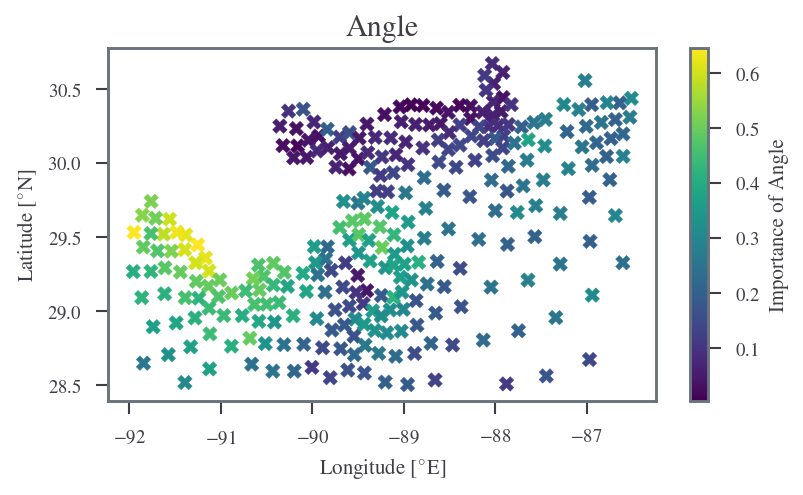

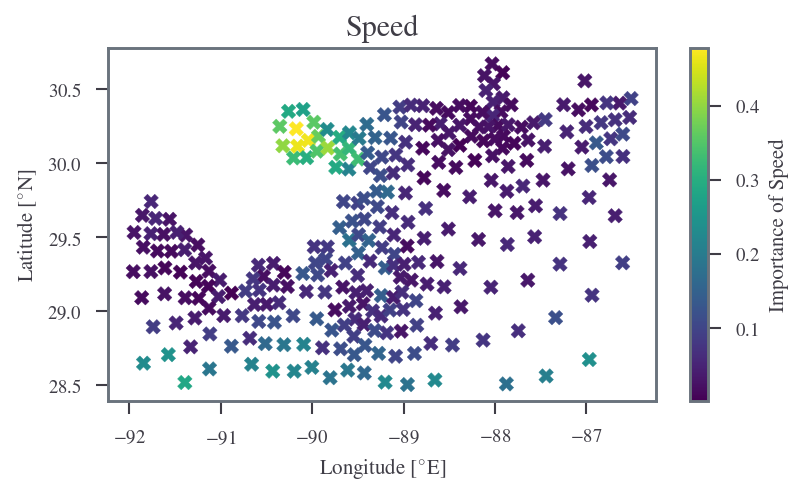

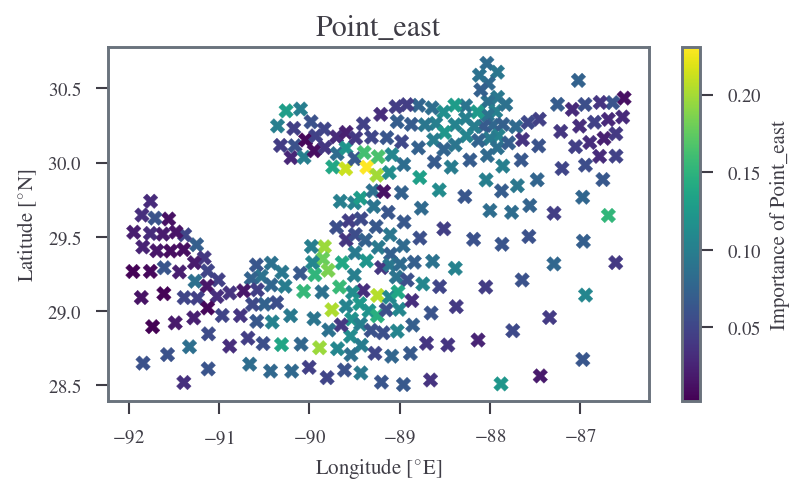

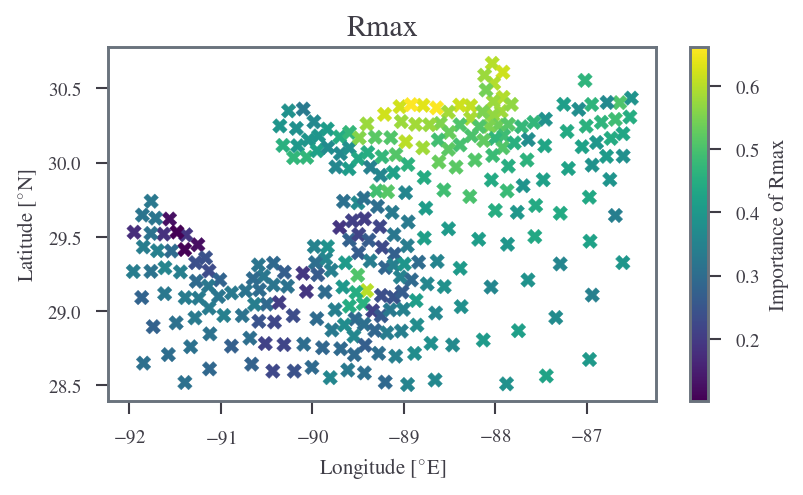

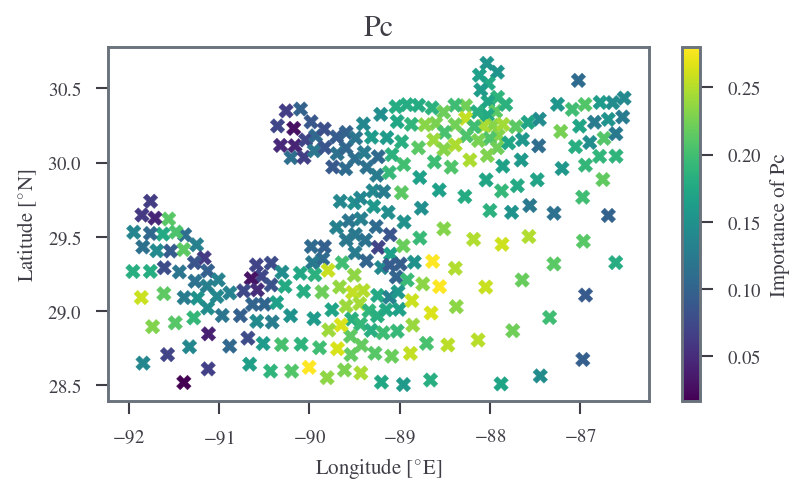

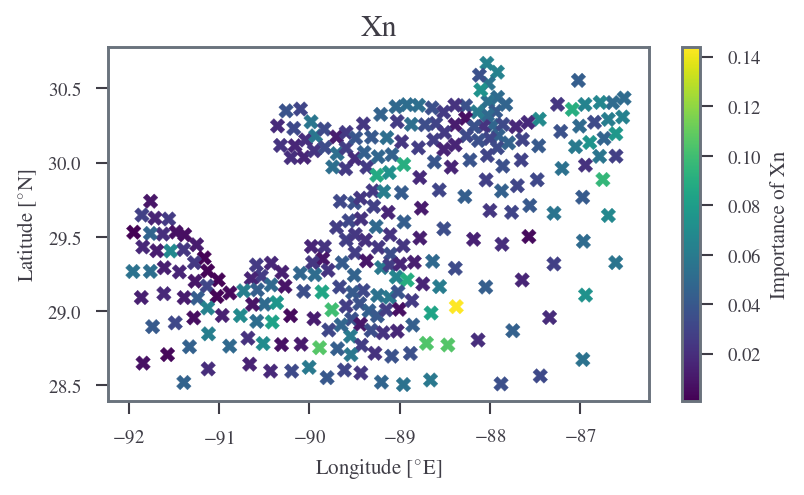

In [ ]:

for i in range(len(FEATURE_LIST)):
    plt.figure()
    plt.scatter(cds_a.isel(node=indices[0]).lon.values, 
                cds_a.isel(node=indices[0]).lat.values, 
                c=importance_array[:, i])
    plt.colorbar(label="Importance of " + FEATURE_LIST[i].capitalize())
    plt.xlabel("Longitude [$^{\circ}$E]")
    plt.ylabel("Latitude [$^{\circ}$N]")
    plt.title(FEATURE_LIST[i].capitalize())
    plt.show()


In [ ]:
# Need to trim triangles, and then plot tricontourf for importances.

array([3033, 3231, 3232, 3233, 3234, 3235, 3429, 3430, 3431, 3432, 3618,
       3619, 3784, 3785, 3933, 3934, 3935, 4081, 4082, 4083, 4084, 4085,
       4086, 4087, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263,
       4264, 4265, 4266, 4292, 4463, 4464, 4465, 4466, 4467, 4468, 4469,
       4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4504,
       4505, 4506, 4555, 4698, 4699, 4700, 4701, 4702, 4703, 4704, 4705,
       4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4715, 4716,
       4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727,
       4748, 4749, 4756, 4812, 4813, 4914, 4915, 4968, 4969, 4970, 4971,
       4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980, 4981, 4982,
       4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993,
       4994, 4995, 4996, 4997, 4998, 4999, 5000, 5001, 5002, 5003, 5020,
       5021, 5088, 5089, 5090, 5186, 5188, 5246, 5247, 5248, 5249, 5250,
       5251, 5252, 5253, 5254, 5255, 5256, 5257, 52

In [ ]:
from src.preprocessing.sel import trim_tri

In [ ]:
triangles.shape

(445, 3)

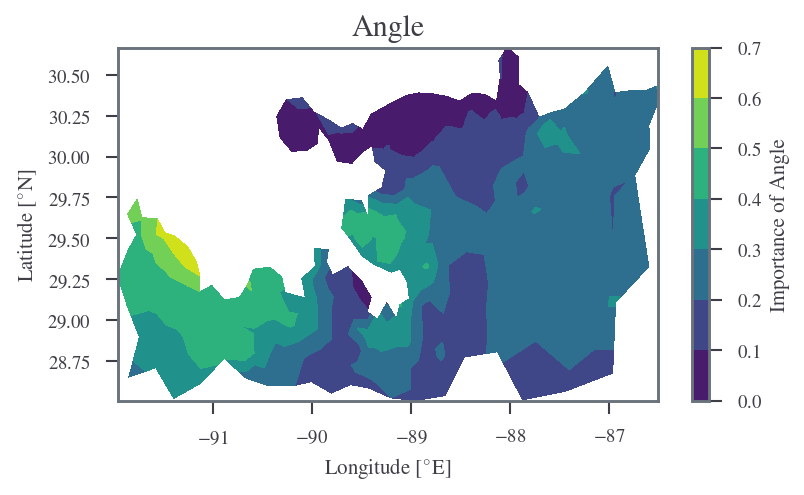

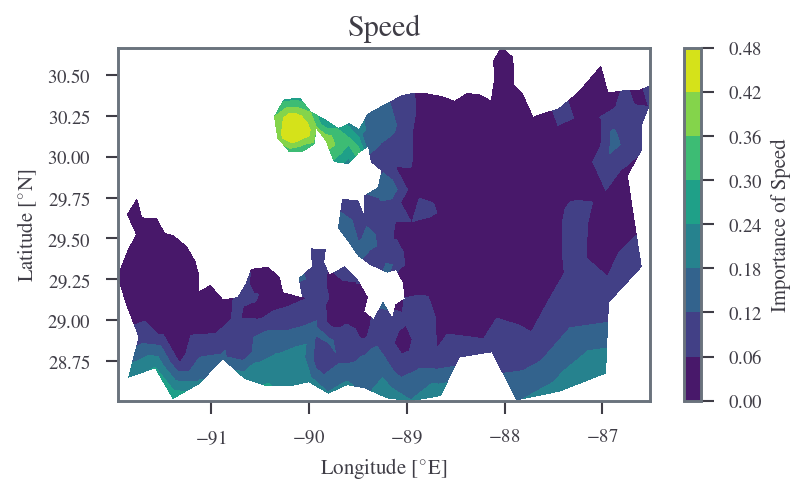

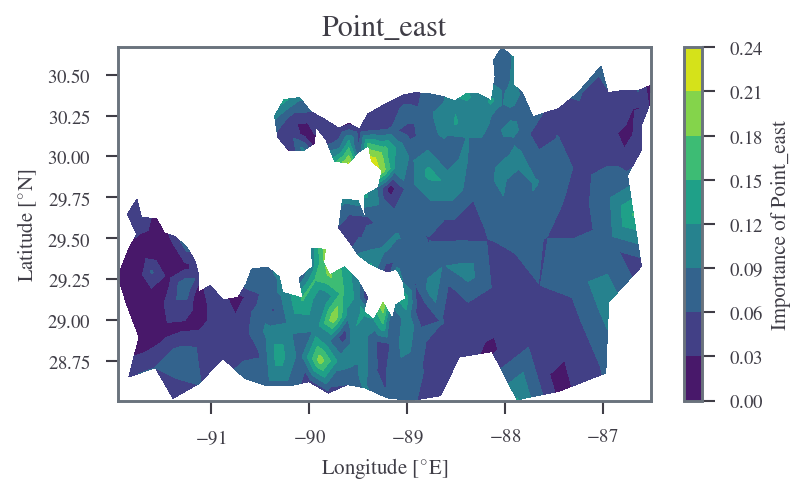

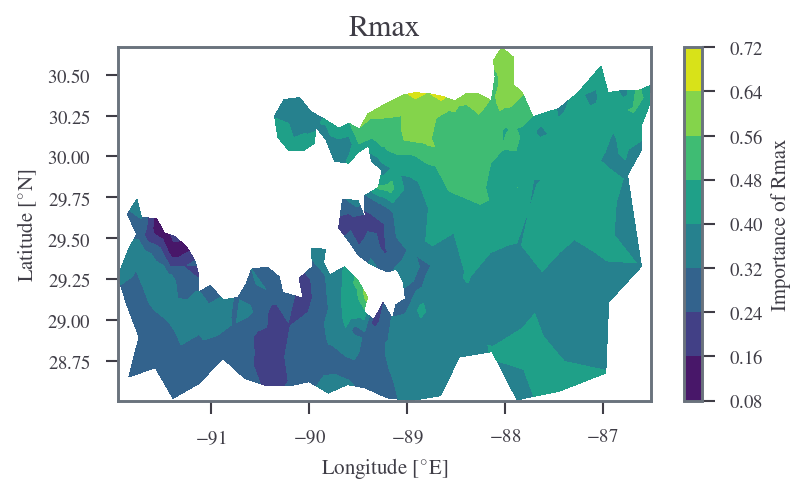

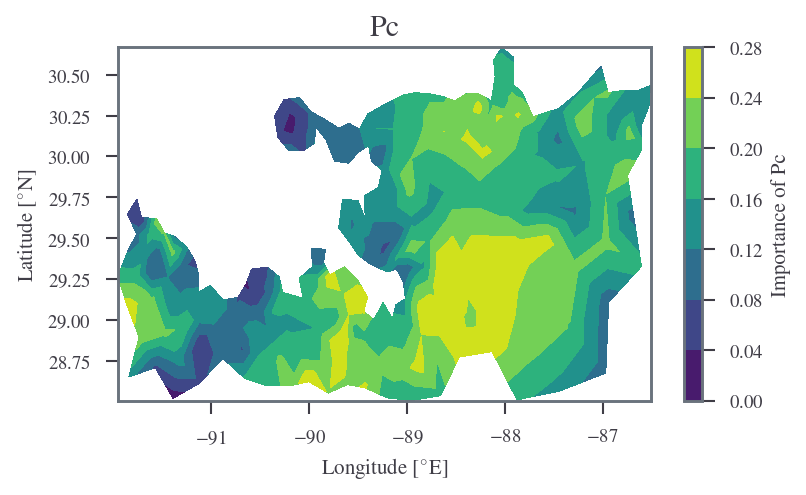

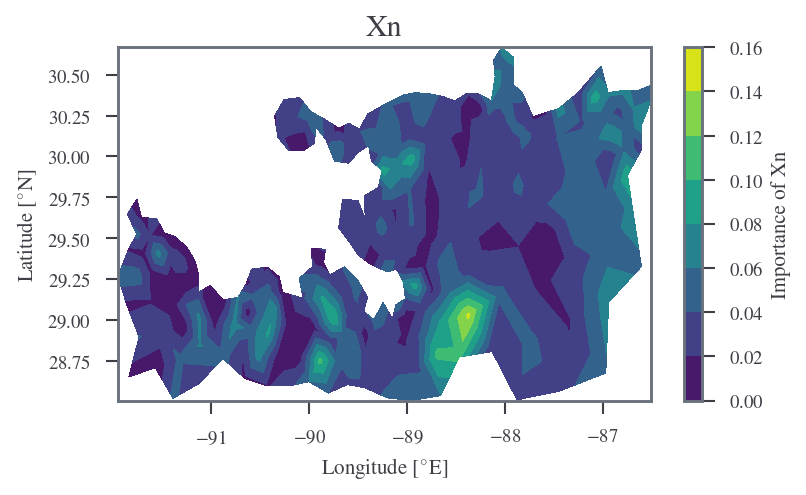

In [ ]:
for i in range(len(FEATURE_LIST)):
    # len(FEATURE_LIST)
    plt.figure()
    lon, lat, triangles = trim_tri(cds_a.lon.values, cds_a.lat.values, cds_a.triangle.values - 1, NO_BBOX)
    plt.tricontourf(lon, lat, triangles, importance_array[:, i])
    plt.colorbar(label="Importance of " + FEATURE_LIST[i].capitalize())
    plt.xlabel("Longitude [$^{\circ}$E]")
    plt.ylabel("Latitude [$^{\circ}$N]")
    plt.title(FEATURE_LIST[i].capitalize())
    plt.show()

In [ ]:
max_importance = np.argmax(importance_array, axis=1)

array([3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

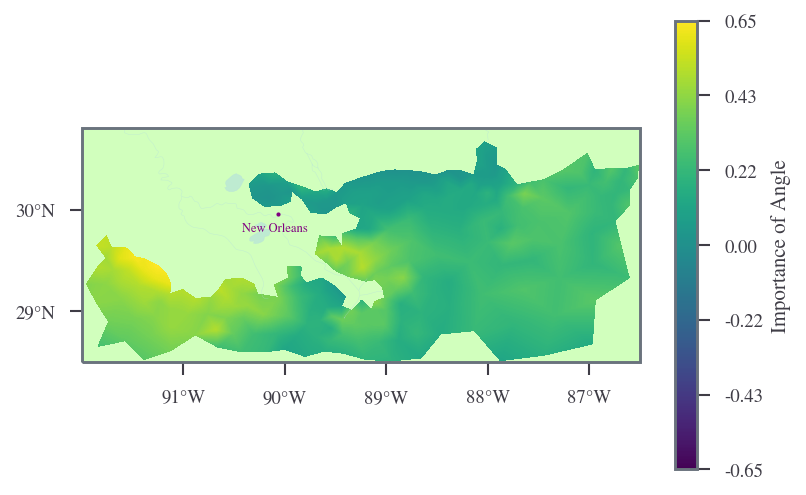

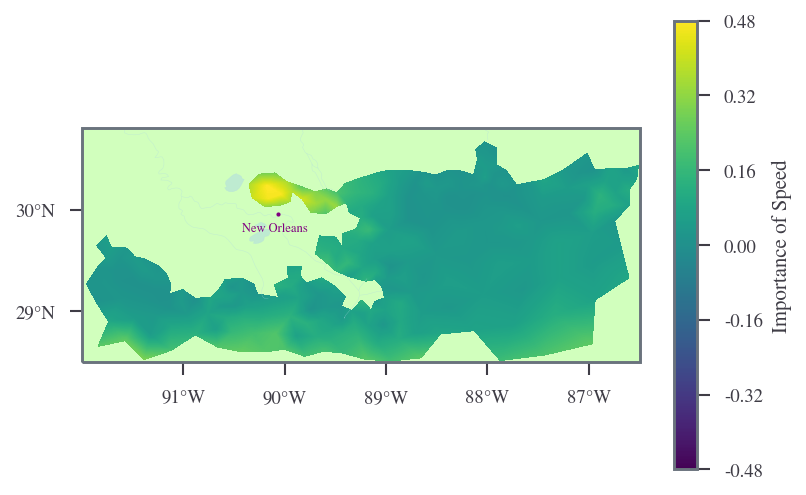

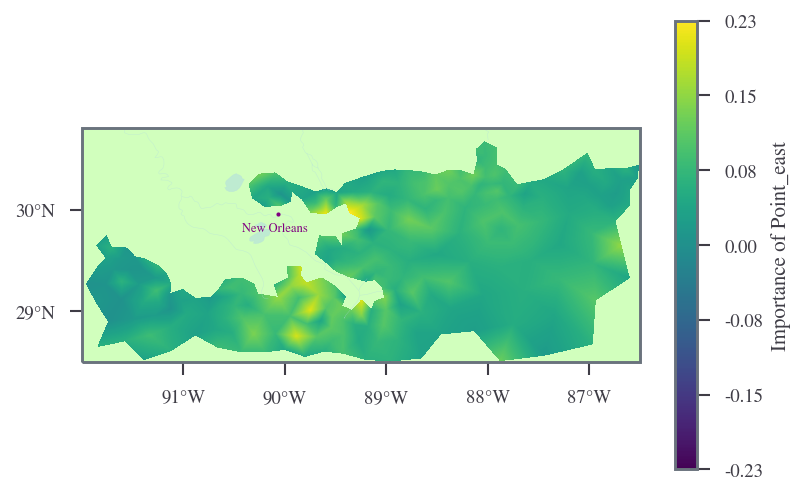

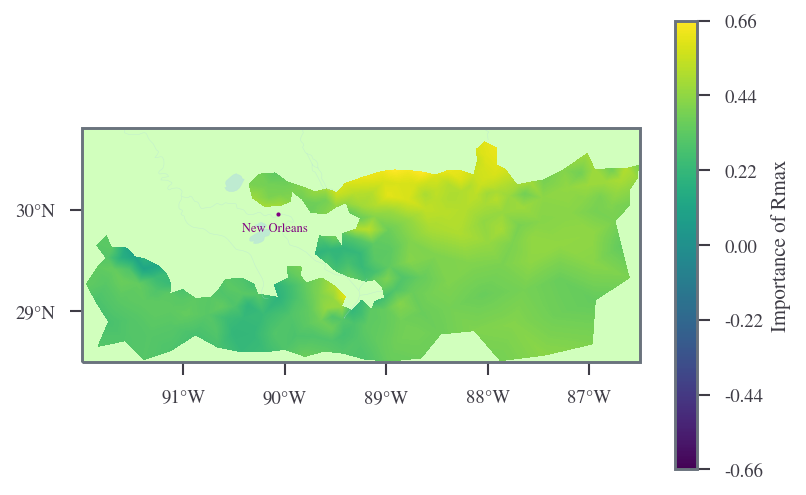

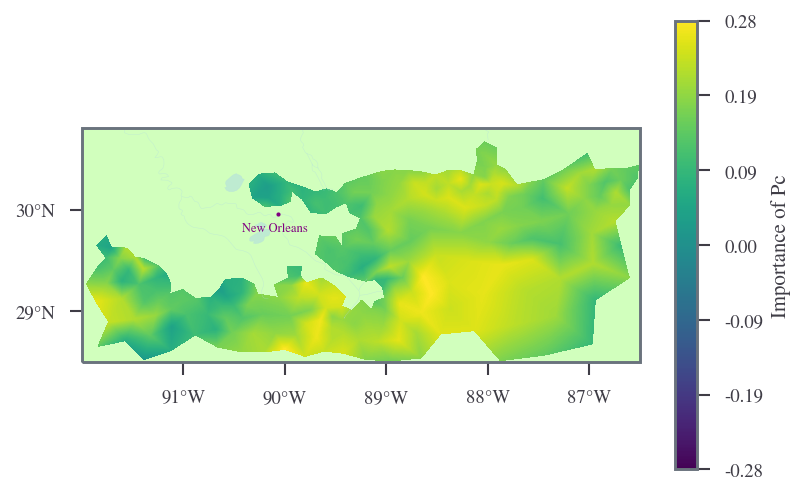

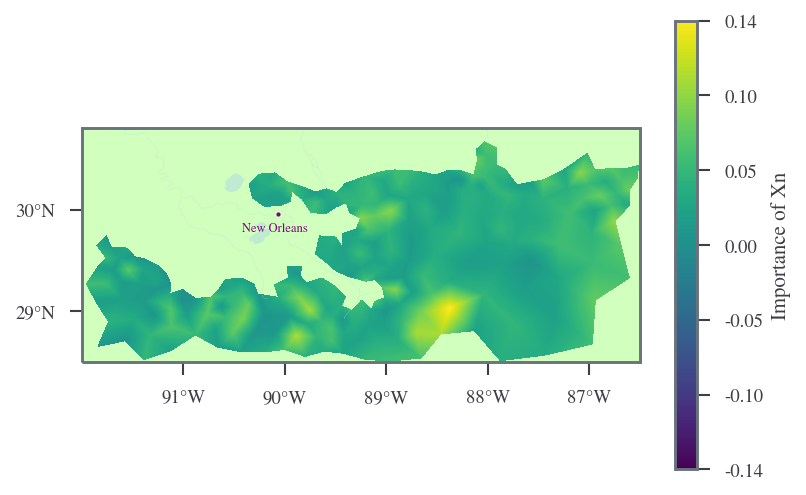

In [ ]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from sithom.plot import lim
from src.constants import NEW_ORLEANS

for i in range(len(FEATURE_LIST)):
    bbox = NO_BBOX
    lon, lat, triangles = trim_tri(cds_a.lon.values, cds_a.lat.values, cds_a.triangle.values - 1, NO_BBOX)
    vmin, vmax = lim(importance_array[:,i], percentile=0, balance=True)
    vmin, vmax = np.min([-vmax, vmin]), np.max([-vmin, vmax])
    levels = np.linspace(vmin, vmax, num=400)
    cbar_levels = np.linspace(vmin, vmax, num=7)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(bbox.cartopy(), crs=ccrs.PlateCarree())
    # add a green-yellow backgroud here
    ax.set_facecolor("#d1ffbd")
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5, color="lightblue")
    # Why are the rivers not plotting in notebook?
    ax.add_feature(cartopy.feature.RIVERS, alpha=0.5, color="lightblue")
    plt.plot(
        NEW_ORLEANS.lon,
        NEW_ORLEANS.lat,
        marker=".",
        markersize=4,
        color="purple",
    )
    plt.text(
        NEW_ORLEANS.lon - 0.35,
        NEW_ORLEANS.lat - 0.16,
        "New Orleans",
        fontsize=6,
        color="purple",
    )
    plt.tricontourf(
        lon, lat, triangles, importance_array[:, i],
        vmin=vmin,
        vmax=vmax,
        levels=levels,
        # cmap="cmo.balance",
    )

    ax = plt.gca()
    cbar = plt.colorbar(label="Importance of " + FEATURE_LIST[i].capitalize())
    cbar.set_ticks(cbar_levels)
    cbar.set_ticklabels(["{:.2f}".format(x) for x in cbar_levels.tolist()])
    plt.xlabel("")
    plt.ylabel("")
    ax.set_yticks(
        [
            x
            for x in range(
                int((bbox.lat[0] // 1) + 1),
                int((bbox.lat[1] // 1) + 1),
            )
        ],
        crs=ccrs.PlateCarree(),
    )
    ax.set_xticks(
        [
            x
            for x in range(
                int((bbox.lon[0] // 1) + 1),
                int((bbox.lon[1] // 1) + 1),
            )
        ],
        crs=ccrs.PlateCarree(),
    )

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    plt.show()

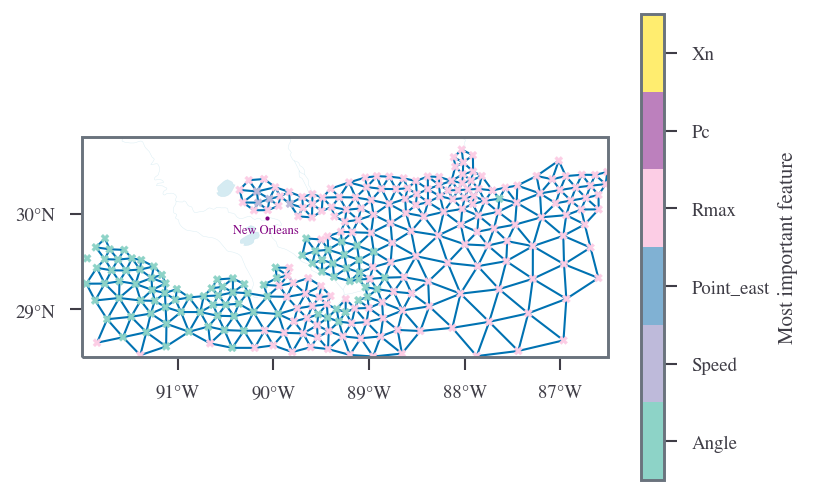

In [453]:
import matplotlib.cm as cm

bbox = NO_BBOX
lon, lat, triangles = trim_tri(cds_a.lon.values, cds_a.lat.values, cds_a.triangle.values - 1, NO_BBOX)
vmin =  - 0.5
vmax = len(FEATURE_LIST) - 0.5
# 0, 1, 2, 3, 4, 5,

r  = len(FEATURE_LIST) -1
levels = [vmin+0.5 + i for i in range(r)] # np.linspace(vmin, vmax, num=r)
cmap = cm.get_cmap("Set3", r+1)
cbar_levels = [vmin+0.5 + i for i in range(r+1)]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(bbox.cartopy(), crs=ccrs.PlateCarree())
# add a green-yellow backgroud here
# ax.set_facecolor("#d1ffbd")
ax.add_feature(cartopy.feature.LAKES, alpha=0.5, color="lightblue")
# Why are the rivers not plotting in notebook?
ax.add_feature(cartopy.feature.RIVERS, alpha=0.5, color="lightblue")
plt.plot(
    NEW_ORLEANS.lon,
    NEW_ORLEANS.lat,
    marker=".",
    markersize=4,
    color="purple",
)
plt.text(
    NEW_ORLEANS.lon - 0.35,
    NEW_ORLEANS.lat - 0.16,
    "New Orleans",
    fontsize=6,
    color="purple",
)
plt.triplot(
    lon,
    lat, 
    triangles)

plt.scatter(lon, lat, c=max_importance, cmap=cmap, vmin=vmin, vmax=vmax, s=15)

ax = plt.gca()
cbar = plt.colorbar(label="Most important feature")
cbar.set_ticks(cbar_levels)
cbar.set_ticklabels([FEATURE_LIST[int(x)].capitalize() for x in cbar_levels])
plt.xlabel("")
plt.ylabel("")
ax.set_yticks(
[
    x
    for x in range(
        int((bbox.lat[0] // 1) + 1),
        int((bbox.lat[1] // 1) + 1),
    )
],
crs=ccrs.PlateCarree(),
)
ax.set_xticks(
[
    x
    for x in range(
        int((bbox.lon[0] // 1) + 1),
        int((bbox.lon[1] // 1) + 1),
    )
],
crs=ccrs.PlateCarree(),
)

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
plt.show()

(array([ 94.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0., 188.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

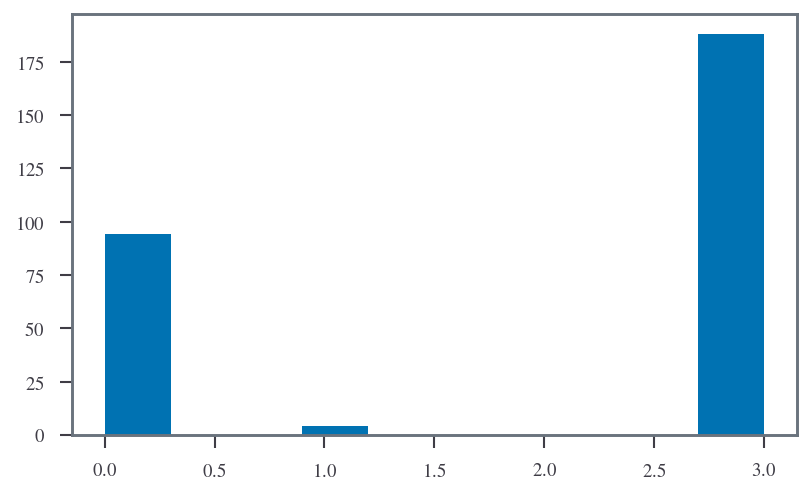

In [ ]:
plt.hist(max_importance)

## Correlation plots

correlation plots for 6 -> 1 task

In [454]:
def return_correlation(index: int = 27):
    return np.array([np.corrcoef(parray_mult[:, i], oa_mult[:, index])[0, 1] for i in range(parray_mult.shape[1])])

correlation_array = np.array([return_correlation(i).tolist() for i in range(oa_mult.shape[1])])

In [455]:
correlation_array.shape

(286, 6)

/Users/simon/new-orleans/env/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


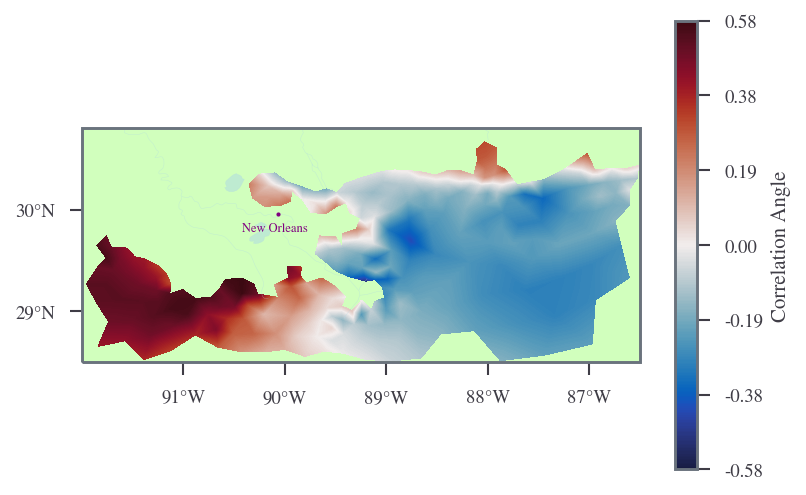

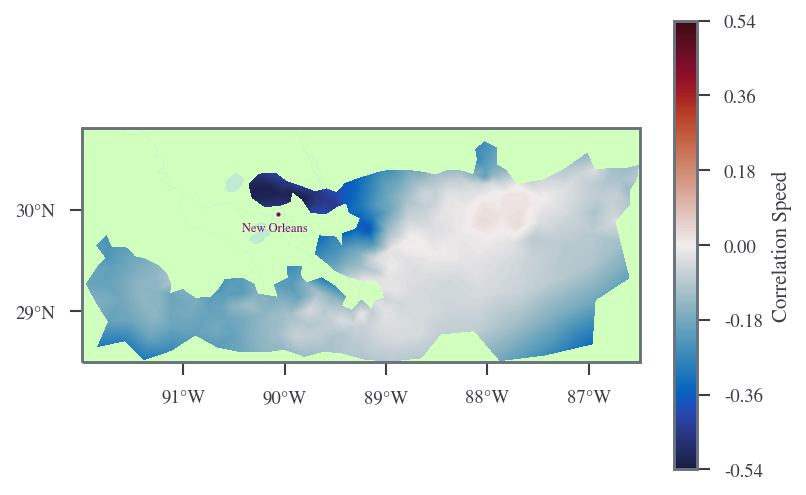

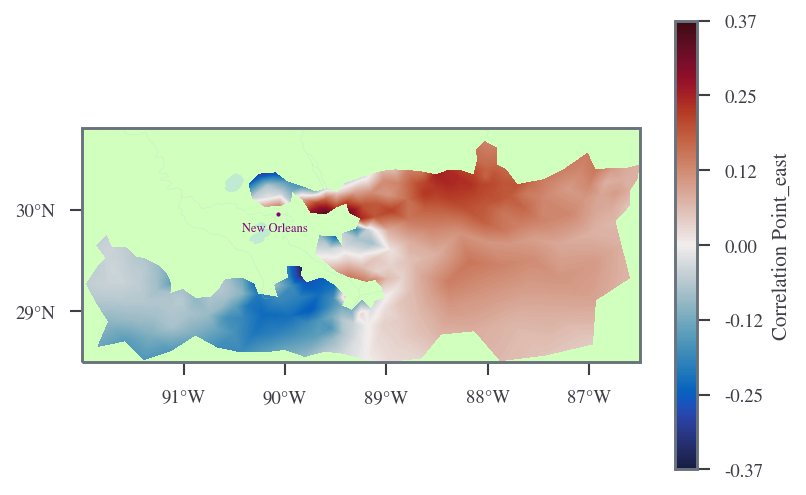

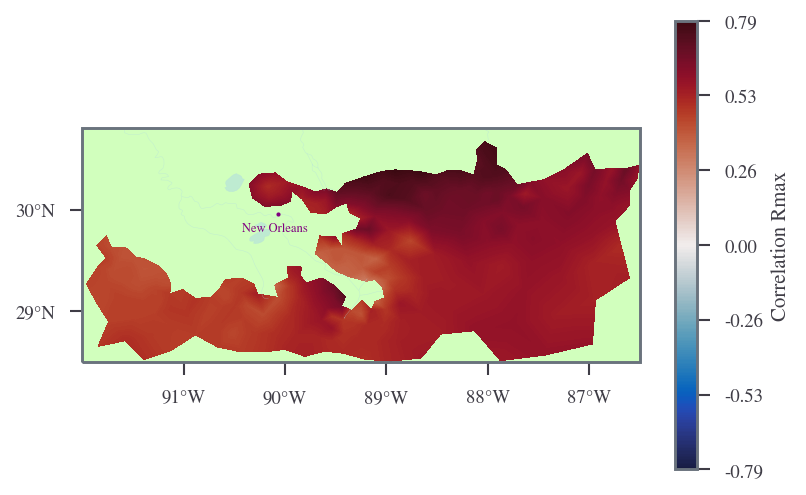

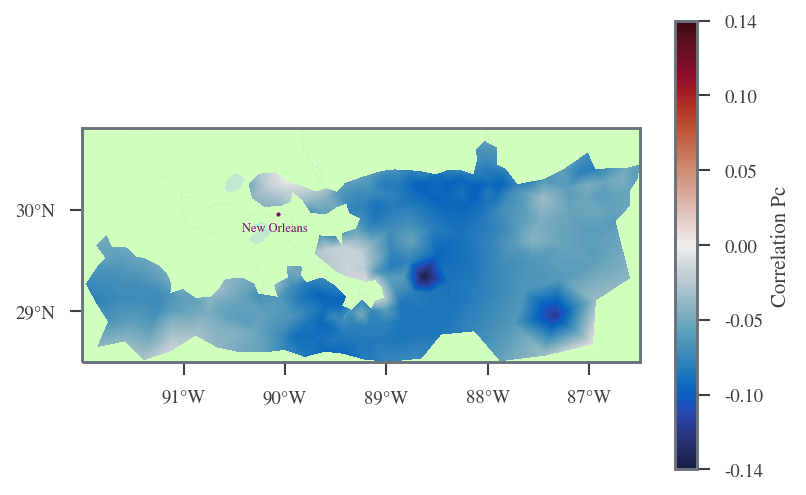

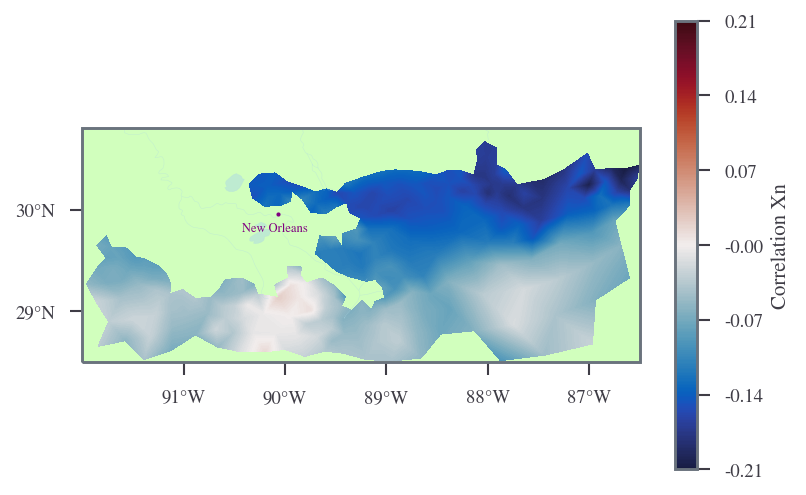

In [456]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from sithom.plot import lim
from src.constants import NEW_ORLEANS

for i in range(len(FEATURE_LIST)):
    bbox = NO_BBOX
    lon, lat, triangles = trim_tri(cds_a.lon.values, cds_a.lat.values, cds_a.triangle.values - 1, NO_BBOX)
    vmin, vmax = lim(correlation_array[:,i], percentile=0, balance=True)
    vmin, vmax = np.min([-vmax, vmin]), np.max([-vmin, vmax])
    levels = np.linspace(vmin, vmax, num=400)
    cbar_levels = np.linspace(vmin, vmax, num=7)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(bbox.cartopy(), crs=ccrs.PlateCarree())
    # add a green-yellow backgroud here
    ax.set_facecolor("#d1ffbd")
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5, color="lightblue")
    # Why are the rivers not plotting in notebook?
    ax.add_feature(cartopy.feature.RIVERS, alpha=0.5, color="lightblue")
    plt.plot(
        NEW_ORLEANS.lon,
        NEW_ORLEANS.lat,
        marker=".",
        markersize=4,
        color="purple",
    )
    plt.text(
        NEW_ORLEANS.lon - 0.35,
        NEW_ORLEANS.lat - 0.16,
        "New Orleans",
        fontsize=6,
        color="purple",
    )
    plt.tricontourf(
        lon, lat, triangles, correlation_array[:, i],
        vmin=vmin,
        vmax=vmax,
        levels=levels,
        cmap="cmo.balance",
    )

    ax = plt.gca()
    cbar = plt.colorbar(label="Correlation " + FEATURE_LIST[i].capitalize())
    cbar.set_ticks(cbar_levels)
    cbar.set_ticklabels(["{:.2f}".format(x) for x in cbar_levels.tolist()])
    plt.xlabel("")
    plt.ylabel("")
    ax.set_yticks(
        [
            x
            for x in range(
                int((bbox.lat[0] // 1) + 1),
                int((bbox.lat[1] // 1) + 1),
            )
        ],
        crs=ccrs.PlateCarree(),
    )
    ax.set_xticks(
        [
            x
            for x in range(
                int((bbox.lon[0] // 1) + 1),
                int((bbox.lon[1] // 1) + 1),
            )
        ],
        crs=ccrs.PlateCarree(),
    )

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    plt.show()

## Let's try 7D now

need: timeseries of heights for nodes, param timeseries

shape was (nodes, data_component, time)?
need something like
(nodes, data_component, time, experiment)
through concatination

In [ ]:
from src.constants import NO_BBOX


def generate_parray2d_and_output(version=0, index=27):
    # load artifact dataset
    # maybe we can add a loop here to get all the artifacts with different versions
    artifact = run.use_artifact(
        f"sdat2/6d_individual_version2/output_dataset:v{version}", type="dataset"
    )
    artifact_dir = artifact.download()
    cds_a = xr.open_dataset(os.path.join(artifact_dir, "combined_ds.nc"))

    # turn 7 parameters into array
    parray = (
        cds_a[["angle", "speed", "point_east", "rmax", "pc", "vmax", "xn"]]
        .to_array()
        .values
    )

    # get clat and clon (centers of cyclone over time)
    clat = cds_a["clat"].values
    clon = cds_a["clon"].values

    # so we want to format the inputs for machine learning, so we need to get the input data into a 2D array
    # parray needs to become as long as clat and clon (repeated entries for 56 timesteps)
    # clat and clon need to appended to this array --> a total of 7 + 2 = 9 parameters * 56 timesteps = 504 entries
    parray_2d = np.array([parray for _ in range(len(clat))])
    # now we need to append clat and clon to this array
    parray_2d = np.append(parray_2d, clat.reshape(-1, 1), axis=1)
    parray_2d = np.append(parray_2d, clon.reshape(-1, 1), axis=1)
    # parray_2d = np.append(parray_2d, clat, axis=1)
    # value order is: angle, speed, point_east, rmax, pc, vmax, xn, clat, clon

    ### output array
    oa = cds_a[["zeta", "u-vel", "v-vel"]].interp({"output_time": cds_a["input_time"]})

    (indices,) = NO_BBOX.indices_inside(cds_a["lon"].values, cds_a["lat"].values)
    oa = oa.isel(node=indices)

    output_array = oa.isel(node=index).to_array().values.transpose()

    return parray_2d, output_array


parray_2d, output_array = generate_parray2d_and_output(version=0)